In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('hotel_bookings.csv')

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.isnull().sum(axis = 0)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df.shape

(119390, 32)

In [ ]:
df = df.drop(columns=['company'])

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.isnull().sum(axis = 0)

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [ ]:
# qs 1, 
# Which months are popular for visit at a hotel and for which age group?

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# check the values of arrival_date_year if it is clean or not
df.arrival_date_year.value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

In [ ]:
# check the values of children 
df.children.value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [ ]:
## Need to delete the outlier (10) from children attribute

df.drop(df[df['children'] == 10].index, inplace = True)


In [ ]:
df.children.value_counts()

0.0    110796
1.0      4861
2.0      3652
3.0        76
Name: children, dtype: int64

In [ ]:
### look into the arrival date month

data_month = df.groupby(by='arrival_date_month').agg('count')


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
arrival_date_month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
April,11089,11089,11089,11089,11089,11089,11089,11089,11089,11089,11089,11089,11045,11089,11089,11089,11089,11089,11089,11089,11089,11089,9758,11089,11089,11089,11089,11089,11089,11089
August,13877,13877,13877,13877,13877,13877,13877,13877,13877,13873,13877,13877,13856,13877,13877,13877,13877,13877,13877,13877,13877,13877,12682,13877,13877,13877,13877,13877,13877,13877
December,6780,6780,6780,6780,6780,6780,6780,6780,6780,6780,6780,6780,6728,6780,6780,6780,6780,6780,6780,6780,6780,6780,5631,6780,6780,6780,6780,6780,6780,6780
February,8068,8068,8068,8068,8068,8068,8068,8068,8068,8068,8068,8068,8012,8068,8068,8068,8068,8068,8068,8068,8068,8068,6461,8068,8068,8068,8068,8068,8068,8068
January,5929,5929,5929,5929,5929,5929,5929,5929,5929,5929,5929,5929,5874,5929,5929,5929,5929,5929,5929,5929,5929,5929,4563,5929,5929,5929,5929,5929,5929,5929
July,12661,12661,12661,12661,12661,12661,12661,12661,12661,12661,12661,12661,12628,12661,12661,12661,12661,12661,12661,12661,12661,12661,11604,12661,12661,12661,12661,12661,12661,12661
June,10939,10939,10939,10939,10939,10939,10939,10939,10939,10939,10939,10939,10927,10939,10939,10939,10939,10939,10939,10939,10939,10939,9806,10939,10939,10939,10939,10939,10939,10939
March,9794,9794,9794,9794,9794,9794,9794,9794,9794,9794,9794,9794,9739,9794,9794,9794,9794,9794,9794,9794,9794,9794,8149,9794,9794,9794,9794,9794,9794,9794
May,11791,11791,11791,11791,11791,11791,11791,11791,11791,11791,11791,11791,11779,11791,11791,11791,11791,11791,11791,11791,11791,11791,10089,11791,11791,11791,11791,11791,11791,11791


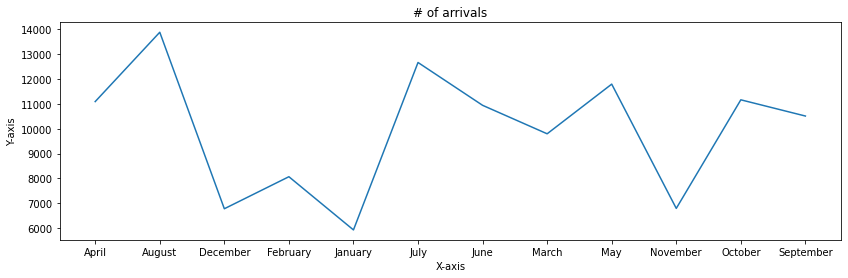

In [ ]:
plt.figure(figsize=(14, 4))
plt.plot(data_month.index, data_month['hotel'])
plt.xticks(data_month.index.to_list())
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title("# of arrivals")
plt.show()

In [ ]:
## Taking a smaller data sets

smaller_dataset = df[['hotel', 'stays_in_weekend_nights', 'adults', 'children']]


In [ ]:
smaller_dataset

,hotel,stays_in_weekend_nights,adults,children
0,Resort Hotel,0,2,0.0
1,Resort Hotel,0,2,0.0
2,Resort Hotel,0,1,0.0
3,Resort Hotel,0,1,0.0
4,Resort Hotel,0,2,0.0
...,...,...,...,...
119385,City Hotel,2,2,0.0
119386,City Hotel,2,3,0.0
119387,City Hotel,2,2,0.0
119388,City Hotel,2,2,0.0


In [ ]:
# checking null values in the smaller dataset
smaller_dataset.isnull().sum(axis = 0)

hotel                      0
stays_in_weekend_nights    0
adults                     0
children                   4
dtype: int64

In [ ]:
# dropping null values from the dataset
smaller_dataset = smaller_dataset.dropna()

In [ ]:
smaller_dataset.isnull().sum(axis=0)

hotel                      0
stays_in_weekend_nights    0
adults                     0
children                   0
dtype: int64

In [ ]:
smaller_dataset.hotel.value_counts()

City Hotel      79326
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
smaller_dataset.stays_in_weekend_nights.value_counts()

0     51996
2     33307
1     30625
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

In [ ]:
# Which hotel is mostly visited by adults?

df_1 = smaller_dataset.groupby(by='hotel').sum()

In [ ]:
df_1

,stays_in_weekend_nights,adults,children
hotel,,,
City Hotel,63079,146829,7248.0
Resort Hotel,47664,74798,5155.0
